In [1]:
import psycopg2
import pandas as pd
import config
from matplotlib import pylab as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import re


color_palette = sns.color_palette(palette='muted', n_colors=None, desat=.75)
sns.set(context='notebook', palette=color_palette, style='whitegrid', font='sans-serif', font_scale=1.5, color_codes=False, rc=None)
pd.set_option('display.max_colwidth', -1)
table_styles = [{'selector': 'td',
                 'props': [('min-width', '100px'), ('text-align', 'center')]},
                {'selector': 'tr',
                 'props': [('border-bottom', '1px dotted black')]},
                {'selector': 'th',
                 'props': [('text-align', 'center')]}
               ]

%matplotlib inline

directory = "url_top_lists/"
stream = "comparison"

In [2]:
conn = None
try:
    # read connection parameters
    paramsS17 = config.cfgAzureS17()
    paramsS03 = config.cfgAzureS03()

    paramsF17 = config.cfgAzureF17()
    paramsF03 = config.cfgAzureF03()
    
    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    connS17 = psycopg2.connect(**paramsS17)
    connS03 = psycopg2.connect(**paramsS03)
    
    connF17 = psycopg2.connect(**paramsF17)
    connF03 = psycopg2.connect(**paramsF03)

    # create a cursor
    curS17 = connS17.cursor()
    curS03 = connS03.cursor()
    
    curF17 = connF17.cursor()
    curF03 = connF03.cursor()

    # execute a statement
    print('PostgreSQL database version:')
    
    curS17.execute('SELECT version()')
    curS03.execute('SELECT version()')
    curF17.execute('SELECT version()')
    curF03.execute('SELECT version()')
    
    # display the PostgreSQL database server version
    db_version_curS17 = curS17.fetchone()
    db_version_curS03 = curS03.fetchone()
    db_version_curF17 = curF17.fetchone()
    db_version_curF03 = curF03.fetchone()
    
    print(db_version_curS17)
    print(db_version_curS03)
    print(db_version_curF17)
    print(db_version_curF03)

    # close the communication with the PostgreSQL
    curS17.close()
    curS03.close()
    curF17.close()
    curF03.close()

except (Exception, psycopg2.DatabaseError) as error:
    print(error)

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)


In [3]:
urlsS17 = pd.read_sql_query("SELECT * FROM tweets_urls;", connS17 )

print("Number of Tweets: %s" %len(urlsS17))
urlsS17.head()

Number of Tweets: 35687


,tweet_id,short_url,resolved_url,response_code,domain,top_level_domain,is_twitter_url,is_media,is_processed,failed
0,989097603664138240,http://arte.tv/abgedreht,https://www.arte.tv/de/videos/RC-014033/abgedreht/,200.0,https://www.arte.tv/,arte.tv,False,False,True,False
1,988175933659021318,https://twitter.com/piersmorgan/status/987388203593322496,https://twitter.com/piersmorgan/status/987388203593322496,200.0,https://twitter.com/,twitter.com,True,False,True,False
2,988176164358361088,https://www.journal.koeln/pol-ham-fahrradfahrer-verletzt-sich-bei-sturz/,https://www.journal.koeln/pol-ham-fahrradfahrer-verletzt-sich-bei-sturz/,200.0,https://www.journal.koeln/,journal.koeln,False,False,True,False
3,988176403412766720,http://www.radionomy.com/erika1,https://www.radionomy.com/en/radio/erika1,200.0,https://www.radionomy.com/,radionomy.com,False,False,True,False
4,988176415995592704,https://twitter.com/JanLatten/status/988161845205913600,https://twitter.com/JanLatten/status/988161845205913600,200.0,https://twitter.com/,twitter.com,True,False,True,False


In [7]:
top_domains = urlsS17['top_level_domain'].value_counts()
top_domains[1:11]

youtube.com      2961
facebook.com     884 
instagram.com    805 
welt.de          534 
spiegel.de       430 
amazon.de        334 
twitch.tv        318 
focus.de         291 
wordpress.com    261 
bild.de          258 
Name: top_level_domain, dtype: int64

In [11]:
spiegel_urls = urlsS17[urlsS17['top_level_domain'] == 'spiegel.de' ]
spiegel_urls

,tweet_id,short_url,resolved_url,response_code,domain,top_level_domain,is_twitter_url,is_media,is_processed,failed
24,988179771426209792,http://www.spiegel.de/wissenschaft/mensch/islam-debatte-die-waschlappigkeit-der-deutschen-politik-a-1203826.html,http://www.spiegel.de/wissenschaft/mensch/islam-debatte-die-waschlappigkeit-der-deutschen-politik-a-1203826.html,200.0,http://www.spiegel.de/,spiegel.de,False,False,True,False
160,989123887362461696,https://ift.tt/2qZ668b,http://www.spiegel.de/karriere/chemnitz-kuendigung-wegen-facebook-hetze-ist-rechtens-a-1204736.html#ref=rss,200.0,http://www.spiegel.de/,spiegel.de,False,False,True,False
161,989137259764076548,https://ift.tt/2qZ668b,http://www.spiegel.de/karriere/chemnitz-kuendigung-wegen-facebook-hetze-ist-rechtens-a-1204736.html#ref=rss,200.0,http://www.spiegel.de/,spiegel.de,False,False,True,False
225,988256665639243777,http://www.spiegel.de/politik/ausland/frankreich-nationalversammlung-billigt-schaerfere-asylgesetze-a-1204243.html?utm_source=dlvr.it&utm_medium=%5Bfacebook%5D&utm_campaign=%5Bspontop%5D#ref=rss,http://www.spiegel.de/politik/ausland/frankreich-nationalversammlung-billigt-schaerfere-asylgesetze-a-1204243.html?utm_source=dlvr.it&utm_medium=%5Bfacebook%5D&utm_campaign=%5Bspontop%5D#ref=rss,200.0,http://www.spiegel.de/,spiegel.de,False,False,True,False
334,987612414563643392,http://www.spiegel.de/kultur/gesellschaft/deutschland-ist-weltoffen-und-cool-kolumne-a-1203974.html?utm_source=dlvr.it&utm_medium=%5Bfacebook%5D&utm_campaign=%5Bspontop%5D#ref=rss,http://www.spiegel.de/kultur/gesellschaft/deutschland-ist-weltoffen-und-cool-kolumne-a-1203974.html?utm_source=dlvr.it&utm_medium=%5Bfacebook%5D&utm_campaign=%5Bspontop%5D#ref=rss,200.0,http://www.spiegel.de/,spiegel.de,False,False,True,False
335,988279507789500416,http://www.spiegel.de/kultur/gesellschaft/deutschland-ist-weltoffen-und-cool-kolumne-a-1203974.html?utm_source=dlvr.it&utm_medium=%5Bfacebook%5D&utm_campaign=%5Bspontop%5D#ref=rss,http://www.spiegel.de/kultur/gesellschaft/deutschland-ist-weltoffen-und-cool-kolumne-a-1203974.html?utm_source=dlvr.it&utm_medium=%5Bfacebook%5D&utm_campaign=%5Bspontop%5D#ref=rss,200.0,http://www.spiegel.de/,spiegel.de,False,False,True,False
477,988183295383998464,http://spon.de/afdq8,http://www.spiegel.de/panorama/gesellschaft/mahnwache-fuer-hund-chico-in-hannover-unser-held-a-1204224.html,200.0,http://www.spiegel.de/,spiegel.de,False,False,True,False
504,988300668069965825,http://m.spiegel.de/panorama/oesterreich-fuehrerlose-waggons-rasen-30-kilometer-bergab-a-1204010.html,http://m.spiegel.de/panorama/oesterreich-fuehrerlose-waggons-rasen-30-kilometer-bergab-a-1204010.html,200.0,http://m.spiegel.de/,spiegel.de,False,False,True,False
528,988303939639660544,http://spon.de/afdpB,http://www.spiegel.de/panorama/justiz/koeln-dutzende-jugendliche-pruegeln-sich-am-rheinufer-a-1204129.html,200.0,http://www.spiegel.de/,spiegel.de,False,False,True,False
571,988063003378700288,http://www.spiegel.de/spiegel/print/d-42842887.html,http://www.spiegel.de/spiegel/print/d-42842887.html,200.0,http://www.spiegel.de/,spiegel.de,False,False,True,False


In [9]:
tweetsS17 = pd.read_sql_query("SELECT * FROM tweets_info;", connS17 )

print("Number of Tweets: %s" %len(tweetsS17))
tweetsS17.head()

Number of Tweets: 112003


,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
0,988175614908788736,1647758059,"Johangeorgenstadt 23:59 Nachtzeit/Trocken/Klar ,Temp: 14°C, Hum:66%, Wind:WSW 0-&gt;24kmh, Baro: 1012.80hPa, Regen: 0.00mm #wetter",Sun Apr 22 22:00:00 +0000 2018,"<a href=""http://saratoga-weather.org/scripts-TweetWX.php#TweetWX"" rel=""nofollow"">TweetWX</a>",de,False,False,NaN,False,...,0,False,False,wetter,None,0,False,None,NaN,NaN
1,988175619098861568,234778734,Beim nächsten Ton ist es 0 Uhr: ♩♩♩,Sun Apr 22 22:00:01 +0000 2018,"<a href=""http://www.rasputin.de/"" rel=""nofollow"">rasputin</a>",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
2,988175627453952002,821834588158853120,[d] DiplIngMarkus Verbrauch gestern: 3.71 kWh Uptime: 41 days 21:01:04 since 23:48:32 13/10/2017,Sun Apr 22 22:00:03 +0000 2018,"<a href=""http://arduino-tweet.appspot.com/"" rel=""nofollow"">Arduino</a>",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
3,988175627479146498,859148218915069952,Alien Mutterschiff sozusagen \n(Hab das Gefühl bin schwanger) \n(Das gibt dann rr Stress) https://t.co/z4uHz2dugO,Sun Apr 22 22:00:03 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
4,988175681996681218,3206249890,@MDegen55 🇩🇪🇩🇪 Gute Nacht 🌃🌃🌃 https://t.co/OTnsAsDGrc,Sun Apr 22 22:00:16 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,False,False,NaN,False,...,0,False,False,None,3206249890,0,False,None,NaN,NaN


In [12]:
about_spiegel_tweets = tweetsS17[tweetsS17['id'].isin(spiegel_urls['tweet_id'].values)]
about_spiegel_tweets

,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
156,988179771426209792,950882597881737216,Wieso Waschlappigkeit trendet? Weil ein SPON-Kolumnist mal wieder die Konsequenzen der Migration relativiert und den Islam verharmlost. Dieser sei ein Ladenhüter und eine politisierte Religion.\n\nWir können mit dieser Migrationspolitik also so weitermachen.\nhttps://t.co/o1gj5KetT3,Sun Apr 22 22:16:31 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",de,True,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
951,988222649825284096,2834511,"Macron vor Besuch bei Trump: ""Wir haben keinen Plan B für Iran"" https://t.co/wCK46562Ge https://t.co/70ZHWqjjhS",Mon Apr 23 01:06:54 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
1406,988254756920377344,2834511,Frankreich: Nationalversammlung billigt schärfere Asylgesetze https://t.co/rRPWkwCIJh https://t.co/n7GoNw9S9b,Mon Apr 23 03:14:29 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,4,False,False,None,None,1,True,None,NaN,NaN
1407,988256665639243777,159902861,RT @SPIEGELONLINE: Frankreich: Nationalversammlung billigt schärfere Asylgesetze https://t.co/rRPWkwCIJh https://t.co/n7GoNw9S9b,Mon Apr 23 03:22:04 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,False,True,9.882548e+17,False,...,0,False,False,None,2834511,1,False,None,NaN,NaN
1480,549627814891094016,2887711905,Snowden-Dokumente: Was die NSA knacken kann - und was nicht http://t.co/kUVurkKbzE via @SPIEGELONLINE,Mon Dec 29 18:07:37 +0000 2014,"<a href=""https://dev.twitter.com/docs/tfw"" rel=""nofollow"">Twitter for Websites</a>",de,False,False,NaN,False,...,1,False,False,None,2834511,1,True,None,NaN,NaN
1481,988260809594802176,863339150748958720,RT @chronoszeit: Snowden-Dokumente: Was die NSA knacken kann - und was nicht http://t.co/kUVurkKbzE via @SPIEGELONLINE,Mon Apr 23 03:38:32 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",de,False,True,5.496278e+17,False,...,0,False,False,None,2887711905 2834511,1,False,None,NaN,NaN
2015,987612414563643392,2834511,Schluss mit Apokalypse: Deutschland ist weltoffen und cool! https://t.co/lnJFcOgStv https://t.co/IyJs7U0Zdg,Sat Apr 21 08:42:03 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,90,False,False,None,None,1,True,None,NaN,NaN
2016,988279507789500416,425304292,RT @SPIEGELONLINE: Schluss mit Apokalypse: Deutschland ist weltoffen und cool! https://t.co/lnJFcOgStv https://t.co/IyJs7U0Zdg,Mon Apr 23 04:52:50 +0000 2018,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",de,False,True,9.876124e+17,False,...,0,False,False,None,2834511,1,False,None,NaN,NaN
2249,988286227068604416,273930677,Spiegel: Nach Luxleaks und Cambridge Analytica: EU will Whistleblower besser schützen https://t.co/bwK143QWW9,Mon Apr 23 05:19:32 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
2378,988289196631691265,745165314,Nach Luxleaks und Cambridge Analytica: EU will Whistleblower besser schützen https://t.co/1OqgzPyoY7 via @SPIEGELONLINE,Mon Apr 23 05:31:20 +0000 2018,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",de,False,False,NaN,False,...,0,False,False,None,2834511,1,False,None,NaN,NaN


In [13]:
def getTweetVariation(df, is_retweet, is_quote, is_reply):
    return df[ (df['is_retweet'] == is_retweet) & (df['is_quote'] == is_quote) & (df['is_reply'] == is_reply)]

op_spiegel_tweets = getTweetVariation(about_spiegel_tweets, False, False, False)
op_spiegel_tweets

,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
156,988179771426209792,950882597881737216,Wieso Waschlappigkeit trendet? Weil ein SPON-Kolumnist mal wieder die Konsequenzen der Migration relativiert und den Islam verharmlost. Dieser sei ein Ladenhüter und eine politisierte Religion.\n\nWir können mit dieser Migrationspolitik also so weitermachen.\nhttps://t.co/o1gj5KetT3,Sun Apr 22 22:16:31 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",de,True,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
951,988222649825284096,2834511,"Macron vor Besuch bei Trump: ""Wir haben keinen Plan B für Iran"" https://t.co/wCK46562Ge https://t.co/70ZHWqjjhS",Mon Apr 23 01:06:54 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
1406,988254756920377344,2834511,Frankreich: Nationalversammlung billigt schärfere Asylgesetze https://t.co/rRPWkwCIJh https://t.co/n7GoNw9S9b,Mon Apr 23 03:14:29 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,4,False,False,None,None,1,True,None,NaN,NaN
1480,549627814891094016,2887711905,Snowden-Dokumente: Was die NSA knacken kann - und was nicht http://t.co/kUVurkKbzE via @SPIEGELONLINE,Mon Dec 29 18:07:37 +0000 2014,"<a href=""https://dev.twitter.com/docs/tfw"" rel=""nofollow"">Twitter for Websites</a>",de,False,False,NaN,False,...,1,False,False,None,2834511,1,True,None,NaN,NaN
2015,987612414563643392,2834511,Schluss mit Apokalypse: Deutschland ist weltoffen und cool! https://t.co/lnJFcOgStv https://t.co/IyJs7U0Zdg,Sat Apr 21 08:42:03 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,90,False,False,None,None,1,True,None,NaN,NaN
2249,988286227068604416,273930677,Spiegel: Nach Luxleaks und Cambridge Analytica: EU will Whistleblower besser schützen https://t.co/bwK143QWW9,Mon Apr 23 05:19:32 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
2378,988289196631691265,745165314,Nach Luxleaks und Cambridge Analytica: EU will Whistleblower besser schützen https://t.co/1OqgzPyoY7 via @SPIEGELONLINE,Mon Apr 23 05:31:20 +0000 2018,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",de,False,False,NaN,False,...,0,False,False,None,2834511,1,False,None,NaN,NaN
2388,988289410566426624,17876054,"Bundesliga-Gedicht: Willst du Spannung sehen, musst du die Tabelle drehen... https://t.co/tO5oUTddhC",Mon Apr 23 05:32:11 +0000 2018,"<a href=""http://www.spiegel.de/"" rel=""nofollow"">SPIEGEL ONLINE Sport</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
2584,987742263127126016,2834511,Kriminalstatistik 2017: Zahl der Straftaten in Deutschland um fast zehn Prozent gesunken https://t.co/N6DhETfVGU https://t.co/EcZay7iq23,Sat Apr 21 17:18:01 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,91,False,False,None,None,1,True,None,NaN,NaN
2700,988183295383998464,17876025,"Mahnwache für Hund Chico: ""Unser Held, unser Freiheitskämpfer""... https://t.co/MTtRzycE8F",Sun Apr 22 22:30:31 +0000 2018,"<a href=""http://www.spiegel.de/"" rel=""nofollow"">SPIEGEL ONLINE Panorama</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,True,None,NaN,NaN


In [19]:
imagesS17 = pd.read_sql_query("SELECT * FROM tweets_media;", connS17 )

print("Number of Images: %s" %len(imagesS17))
imagesS17.head()

Number of Images: 29930


,tweet_id,media_url,type,response_code,hash,path,is_processed
0,989362619692802048,http://pbs.twimg.com/media/DbrsDTxX0AEtjlE.jpg,photo,200,89e6f3e8e673b7c7,PostgreSQL/media/89e6f3e8e673b7c7.JPEG,True
1,987388203593322496,http://pbs.twimg.com/media/DbPoUpuWAAEm4cX.jpg,photo,200,e0f0eaea57b1f8f0,PostgreSQL/media/e0f0eaea57b1f8f0.JPEG,True
2,988176193722769409,http://pbs.twimg.com/media/DbVn4W1XcAAXMph.jpg,photo,200,a1a4413170627673,PostgreSQL/media/a1a4413170627673.JPEG,True
3,988161845205913600,http://pbs.twimg.com/tweet_video_thumb/Dban1LCXkAEc3xu.jpg,animated_gif,200,9b1785b1cdcb11cc,PostgreSQL/media/9b1785b1cdcb11cc.JPEG,True
4,988033487948173312,http://pbs.twimg.com/media/DbYy99XW0AA7-ZW.jpg,photo,200,ccc42d39c5c53919,PostgreSQL/media/ccc42d39c5c53919.JPEG,True


In [20]:
op_images_spiegel = imagesS17[imagesS17['tweet_id'].isin(op_spiegel_tweets['id'].values)]
op_images_spiegel

,tweet_id,media_url,type,response_code,hash,path,is_processed
588,987742263127126016,http://pbs.twimg.com/media/DbUqWkvVQAA2FdX.jpg,photo,200,c8d8921878785458,PostgreSQL/media/c8d8921878785458.JPEG,True
674,988063003378700288,http://pbs.twimg.com/media/DbZOA7hXkAAOtu5.jpg,photo,200,6cd05b554763414d,PostgreSQL/media/6cd05b554763414d.JPEG,True
675,988063003378700288,http://pbs.twimg.com/media/DbZOCwUX0AABlPM.jpg,photo,200,1127c7b3395f6d68,PostgreSQL/media/1127c7b3395f6d68.JPEG,True
881,988337041074110465,http://pbs.twimg.com/media/DbdHTPaUwAA20mb.jpg,photo,200,7169696969796979,PostgreSQL/media/7169696969796979.JPEG,True
1081,988361237997211648,http://pbs.twimg.com/media/DbddTTXXcAEqTCC.jpg,photo,200,1b47132771316d47,PostgreSQL/media/1b47132771316d47.JPEG,True
1132,987629174126006272,http://pbs.twimg.com/media/DbTA5DsWAAAXa6d.jpg,photo,200,53534b595d256575,PostgreSQL/media/53534b595d256575.JPEG,True
1161,988370079602491392,http://pbs.twimg.com/media/DbdlWSnU8AAu_Yu.jpg,photo,200,f0e8e9e9c9d9d9c9,PostgreSQL/media/f0e8e9e9c9d9d9c9.JPEG,True
1458,988399959505489920,http://pbs.twimg.com/media/DbeAhlLV4AIqZNn.jpg,photo,200,8695929b1b5b2a65,PostgreSQL/media/8695929b1b5b2a65.JPEG,True
1807,988429793417875456,http://pbs.twimg.com/media/Dbebp1YVMAEcGEB.jpg,photo,200,797979892e0b2b7b,PostgreSQL/media/797979892e0b2b7b.JPEG,True
1832,988431719182323714,http://pbs.twimg.com/media/DbedZ7NWsAA6Jz6.jpg,photo,200,d3d5195b4b6b7f4c,PostgreSQL/media/d3d5195b4b6b7f4c.JPEG,True


In [16]:
op_spiegel_tweets['hashtags'].dropna()

2959      Tanzbrunnen Köln Massenschlägerei Rheinufer                                        
3916      Sponsoring Tabaklobby                                                              
4126      Chico                                                                              
4160      G7 Russland Skripal Douma                                                          
4570      Spiegel Hamburg Deutschland Bundestag AfD                                          
6327      Chico Jemen                                                                        
7637      PAG NdsSOG PolGNRW                                                                 
8219      news newsDE infos                                                                  
8741      Faschist Tuerkei Nazis                                                             
9135      ITsec sicherheit                                                                   
9780      SKANDAL Deutschland AfD                           

In [26]:
cardsS17 = pd.read_sql_query("SELECT * FROM tweets_icards where has_icard is true and response_code is not null;", connS17 )

print("Number of Cards: %s" %len(cardsS17))
cardsS17.head()

Number of Cards: 18270


,tweet_id,url,title,text,domain,top_level_domain,response_code,img,hash,path,has_icard,is_processed
0,990660022764998656,http://www.faz.net/aktuell/politik/ausland/oesterreich-diskutiert-ueber-die-kaltschnaeuzigen-blauhelme-15566647.html?utm_content=buffer316f8&utm_medium=social&utm_source=twitter.com&utm_campaign=GEPC%253Ds30,Blauhelme beobachten Morde: Dieses Video schockiert Österreich,Sie hätten die „Hunde“ warnen sollen: Ein kurzer Clip zeigt einen Hinterhalt am Golan. Zwei österreichische Blauhelme kommentieren das Blutbad. Ihre Kaltschnäuzigkeit wirft eine Frage auf.,http://www.faz.net/,faz.net,200,https://pbs.twimg.com/card_img/990643871183966210/A5Hmhyd9?format=jpg&name=600x314,f927fe1a26e1387c,PostgreSQL/media/f927fe1a26e1387c.JPEG,True,True
1,988177477150347264,https://events.help.ch/eventinfo.cfm?key=2123648,Lesung: Alice Schwarzer,None,https://events.help.ch/,help.ch,200,None,None,None,True,True
2,990668998600806400,http://parstoday.com/de/news/iran-i39804-gerichtsprozess_gegen_is_terroristen_in_teheran,Gerichtsprozess gegen IS-Terroristen in Teheran,Teheran (ParsToday) - Das Revolutionsgericht in Teheran hat heute den Prozess gegen einen der festgenommenen IS-Terroristen eröffnet.,http://parstoday.com/,parstoday.com,200,https://pbs.twimg.com/card_img/993227756526866433/g9rY5Hk-?format=jpg&name=600x314,d49dc8eacacc9484,PostgreSQL/media/d49dc8eacacc9484.JPEG,True,True
3,990700770440998914,https://www.youtube.com/watch?v=7eevhSWJZCE&feature=youtu.be,Obama HASST Deutsche !,Meinung in die Kommentare! Wer mich Unterstützen Möchte :) ! http://www.paypal.me/UnlustigTv Kanzlerakte: http://bit.ly/1OH1xmJ Die vier Siegermächte:http://...,https://www.youtube.com/,youtube.com,200,https://pbs.twimg.com/card_img/991806597625204736/mDDy1vBR?format=jpg&name=280x280,b331b171b333b333,PostgreSQL/media/b331b171b333b333.JPEG,True,True
4,983622981367812096,https://www.youtube.com/watch?v=yiWCGP4iKf4,geld verdienen - EINFACH ✅ (78+ Strategien die funktionieren!),Geld verdienen: https://12geldverdieneniminternet.com/online-geld-verdienen/ Auf meinem Blogartikel findet Ihr Infos zu den Quellen und Systemen! Lerne in di...,https://www.youtube.com/,youtube.com,200,https://pbs.twimg.com/card_img/992389430458667008/LqtcpsO4?format=jpg&name=280x280,f0e4e4c6dab6fc98,PostgreSQL/media/f0e4e4c6dab6fc98.JPEG,True,True


In [27]:
op_cards_spiegel = cardsS17[cardsS17['tweet_id'].isin(op_spiegel_tweets['id'].values)]
op_cards_spiegel

,tweet_id,url,title,text,domain,top_level_domain,response_code,img,hash,path,has_icard,is_processed
246,988658899384487936,http://www.spiegel.de/politik/ausland/wahlkampfauftritte-berlin-hofft-auf-vernunft-von-recep-tayyip-erdogan-a-1204418.html,Streit über türkische Wahlkampfauftritte: Berlin hofft auf Erdogans Vernunft - SPIEGEL ONLINE -...,"Während daheim hitzig über Wahlkampfauftritte türkischer Politiker debattiert wird, trifft Außenminister Maas seinen Kollegen Cavusoglu - und belässt es bei Appellen. Wie aber reagiert Staatschef...",http://www.spiegel.de/,spiegel.de,200,https://pbs.twimg.com/card_img/991163791244132352/ONxKyj-2?format=jpg&name=600x314,c3f3938392c2c004,PostgreSQL/media/c3f3938392c2c004.JPEG,True,True
497,990639245336465409,http://www.spiegel.de/politik/ausland/usa-macrons-baum-aus-dem-garten-des-weissen-hauses-verschwunden-a-1205435.html,Weißes Haus: Macrons Baum ist weg - SPIEGEL ONLINE - Politik,US-Präsident Trump und Frankreichs Präsident Macron hatten vor wenigen Tagen mit großer Geste gemeinsam einen Baum im Garten des Weißen Hauses gepflanzt. Jetzt ist er schon wieder verschwunden.,http://www.spiegel.de/,spiegel.de,200,https://pbs.twimg.com/card_img/993173432127770627/RWP5iNse?format=jpg&name=600x314,9cf8c2bc5ec894c3,PostgreSQL/media/9cf8c2bc5ec894c3.JPEG,True,True
798,988066404741066758,https://magazin.spiegel.de/SP/2018/17/156942797/,Spiegel-Gespräch mit dem Philosophen Richard David Precht über seine Vision von der Zukunft,None,https://magazin.spiegel.de/,spiegel.de,200,https://pbs.twimg.com/card_img/992449270254133249/oAGfDGsC?format=jpg&name=600x314,ea6a768547478723,PostgreSQL/media/ea6a768547478723.JPEG,True,True
1030,989841335371882496,http://www.spiegel.de/kultur/musik/abba-wiedervereinigung-der-schwedischen-popband-a-1205183.html,Zwei neue Songs: ABBA wiedervereinigt - SPIEGEL ONLINE - Kultur,Eigentlich wollten sie nur Avatare von sich auf Tour schicken. Doch in den Gesprächen über das Projekt sind sich die vier Musiker von ABBA wieder nähergekommen. Das Ergebnis: zwei neue Songs.,http://www.spiegel.de/,spiegel.de,200,https://pbs.twimg.com/card_img/989911114006827008/4WEPCXSY?format=jpg&name=600x314,e4133b3111d0c841,PostgreSQL/media/e4133b3111d0c841.JPEG,True,True
1247,990203103688392704,http://www.spiegel.de/kultur/gesellschaft/informationsflut-aufbaeumen-gegen-die-ohnmacht-kolumne-a-1204937.html,Informationsflut: Aufbäumen gegen die Ohnmacht - SPIEGEL ONLINE - Kultur,"Nach allem, was man so liest und hört, trudelt die Welt nur noch vor sich hin. Wie wunderbar, dass nicht mehr alle Menschen den Schlingerkurs mitmachen, sondern sich wehren.",http://www.spiegel.de/,spiegel.de,200,https://pbs.twimg.com/card_img/992711558743588865/43Ut-eC3?format=jpg&name=600x314,928c8d8829382d6d,PostgreSQL/media/928c8d8829382d6d.JPEG,True,True
1510,990674725394436097,http://www.spiegel.de/politik/deutschland/bayern-kardinal-marx-kritisiert-soeders-kruzifix-vorstoss-a-1205443.html,Kreuz-Erlass: Kardinal Marx wirft Söder Spaltung vor - SPIEGEL ONLINE - Politik,Diese Kritik sitzt - und sie kommt ausgerechnet vom Vorsitzenden der katholischen Deutschen Bischofskonferenz: Kardinal Marx attackiert Bayerns Regierungschef Söder für dessen Kreuz-Erlass. Durch ihn...,http://www.spiegel.de/,spiegel.de,200,https://pbs.twimg.com/card_img/993211495059197952/YwvCMA1H?format=jpg&name=600x314,eae5e63657526b52,PostgreSQL/media/eae5e63657526b52.JPEG,True,True
1539,988179771426209792,http://www.spiegel.de/wissenschaft/mensch/islam-debatte-die-waschlappigkeit-der-deutschen-politik-a-1203826.html,Islamdebatte: Die unerträgliche Waschlappigkeit der deutschen Politik - SPIEGEL ONLINE - Wissensc...,"Der Rest der Welt blickt, wenn überhaupt, fassungslos nach Deutschland: Fast alle hätten gern das, was wir haben, es geht uns nämlich hervorragend. Und was tun wir? Ängste kultivieren.",http://www.spiegel.de/,spiegel.de,200,https://pbs.twimg.com/card_img/990506510953443329/l9JyF_QV?format=jpg&name=600x314,9e96b6b2d3d2f0f8,PostgreSQL/medi

In [37]:
hashtagsS17 = pd.read_sql_query("SELECT * FROM tweets_hashtags;", connS17 )

print("Number of Hashtags: %s" %len(hashtagsS17))
hashtagsS17.head()

Number of Hashtags: 73935


,tweet_id,hashtag
0,988175614908788736,wetter
1,988176244029251584,MTVBRPETNUGGET
2,988176244029251584,MTVBRSHADETAYLORKATY
3,988176244029251584,PremiosMTVMiaw
4,988176244029251584,MTVLAINSTAGLCAMILAC


In [38]:
op_hashtags_spiegel = hashtagsS17[hashtagsS17['tweet_id'].isin(op_spiegel_tweets['id'].values)]
op_hashtags_spiegel

,tweet_id,hashtag
1911,988303939639660544,Tanzbrunnen
1912,988303939639660544,Köln
1913,988303939639660544,Massenschlägerei
1914,988303939639660544,Rheinufer
2632,988322563372867584,Sponsoring
2633,988322563372867584,Tabaklobby
2771,988323151242235904,Chico
2788,988314830284165121,G7
2789,988314830284165121,Russland
2790,988314830284165121,Skripal


In [40]:
mentionsS17 = pd.read_sql_query("SELECT * FROM user_mentions;", connS17 )

print("Number of User Mentions: %s" %len(mentionsS17))
mentionsS17.head()

Number of User Mentions: 100369


,tweet_id,user_id,name,screen_name
0,988175681996681218,3206249890,Manfred Degen,MDegen55
1,988175711348363264,741626414072467457,vivi🤓,sesokitz
2,988175778474020868,10228272,YouTube,YouTube
3,988175933659021318,362144301,Brian Moore,brianmoore666
4,988176021726941185,760091686886371328,lil l,Payzn_


In [41]:
op_mentions_spiegel = mentionsS17[mentionsS17['tweet_id'].isin(op_spiegel_tweets['id'].values)]
op_mentions_spiegel

,tweet_id,user_id,name,screen_name
1092,549627814891094016,2834511,SPIEGEL ONLINE,SPIEGELONLINE
1751,988289196631691265,2834511,SPIEGEL ONLINE,SPIEGELONLINE
2241,988303939639660544,2834511,SPIEGEL ONLINE,SPIEGELONLINE
2461,988306311573049344,3292982985,Karl Lauterbach,Karl_Lauterbach
2468,988309232838758401,2834511,SPIEGEL ONLINE,SPIEGELONLINE
2482,988306997006274560,3292982985,Karl Lauterbach,Karl_Lauterbach
2975,988322563372867584,3292982985,Karl Lauterbach,Karl_Lauterbach
2976,988322563372867584,46085533,CDU/CSU,cducsubt
3465,988337041074110465,849687610910027785,Peril Of Africa,perilofafrica
4623,987629174126006272,17965092,DER SPIEGEL,DerSPIEGEL


In [42]:
op_spiegel_tweets[(~op_spiegel_tweets['id'].isin(cardsS17['tweet_id'].values)) & 
                  (~op_spiegel_tweets['id'].isin(op_images_spiegel['tweet_id'].values)) & 
                  (~op_spiegel_tweets['id'].isin(op_hashtags_spiegel['tweet_id'].values)) &
                  (~op_spiegel_tweets['id'].isin(op_mentions_spiegel['tweet_id'].values))]

,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
4248,988297510346207232,891960691871154176,Zur Ablenkung ein unbekanntes Bauernopfer?!\nhttps://t.co/i7yeCNx4p0,Mon Apr 23 06:04:22 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,False,False,NaN,False,...,4,False,False,None,None,1,True,None,NaN,NaN
22118,988719102515666945,5138291,"»Aus Angst, Muslime in ihrem Glauben zu beleidigen, haben britische Geschichtslehrer den Holocaust aus ihrem Unterricht verbannt.«\n\nhttps://t.co/IBmKOegTQi",Tue Apr 24 09:59:38 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,True,False,NaN,False,...,1,False,False,None,None,1,True,None,NaN,NaN
30347,988853510866382849,43935340,Unkommntierbar und unfassbar....ob er wohl Ungläubige getötet hat? https://t.co/nOYySDSqdw,Tue Apr 24 18:53:43 +0000 2018,"<a href=""http://www.facebook.com/twitter"" rel=""nofollow"">Facebook</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
37557,988890941053394945,3292982985,"Bei Kindern wird mit Zahnspangen Abzocke betrieben. Eltern werden verunsichert um Geschäft zu machen. Vor Essstörungen und ""Atmungsproblemen"" wird gewarnt. Die Kassen machen anteilig mit weil sie Eltern und Kinder, nicht alte Leute, als Mitglieder wollen https://t.co/7quWFCqyqq",Tue Apr 24 21:22:27 +0000 2018,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",de,True,False,NaN,False,...,17,False,False,None,None,1,True,None,NaN,NaN
68987,989441982195027968,1560724050,"Super, man kann jetzt auch Steuergeld-Parasit und -Schmarotzer studieren. https://t.co/vtLFi5lKKu",Thu Apr 26 09:52:06 +0000 2018,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",de,False,False,NaN,False,...,524,False,False,None,None,1,True,None,NaN,NaN
69951,989755802146684931,37021941,HIRNREIZUNG: Wut auf Kommando - DER SPIEGEL 29/1965 https://t.co/kSGNnFcJKY,Fri Apr 27 06:39:06 +0000 2018,"<a href=""http://www.apple.com/"" rel=""nofollow"">OS X</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
73838,989705555764809728,138365095,Bachelor in Flüchtlingshilfe?\nMaster of Grand Remplacement?\n\nAnti-westlichen Aktivismus kann man jetzt studieren. Im Westen. Finanziert mit westlichem Steuergeld. https://t.co/FcOp9nYelj,Fri Apr 27 03:19:26 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,True,False,NaN,False,...,64,False,False,None,None,1,True,None,NaN,NaN
85625,990122367539138560,106194249,Amazon-Experiment: Was der Konzern mit jedem Klick erfährt https://t.co/MQpRnkkC6o,Sat Apr 28 06:55:42 +0000 2018,"<a href=""http://getfalcon.pro"" rel=""nofollow"">Falcon Pro 2015 BETA</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
111265,990488528130859010,1735041,"Arm trotz Vollzeit-Arbeit: 3,7 Millionen Beschäftigte verdienen weniger als 2000 Euro brutto https://t.co/24v8wndEZA",Sun Apr 29 07:10:42 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,False,False,NaN,False,...,67,False,False,None,None,1,True,None,NaN,NaN


In [44]:
len(op_images_spiegel) / len(op_spiegel_tweets) * 100

22.22222222222222

In [48]:
len(set(op_images_spiegel['tweet_id'].values))

67

In [78]:
op_images_spiegel_photo = op_images_spiegel[op_images_spiegel['type'] == 'photo']
op_images_spiegel_gif = op_images_spiegel[op_images_spiegel['type'] == 'animated_gif']
op_images_spiegel_video = op_images_spiegel[op_images_spiegel['type'] == 'video']

In [82]:
op_images_spiegel[op_images_spiegel['type'] != 'photo']

,tweet_id,media_url,type,response_code,hash,path,is_processed
11824,989838836439142401,http://pbs.twimg.com/tweet_video_thumb/DbydK0XXUAAs9Wy.jpg,animated_gif,200,2131717121313131,PostgreSQL/media/2131717121313131.JPEG,True
22742,989175703542222848,http://pbs.twimg.com/tweet_video_thumb/DbQ7exVWkAEbSic.jpg,animated_gif,200,d3c3c1e4c4c4c6d6,PostgreSQL/media/d3c3c1e4c4c4c6d6.JPEG,True


In [80]:
op_images_spiegel_gif

,tweet_id,media_url,type,response_code,hash,path,is_processed
11824,989838836439142401,http://pbs.twimg.com/tweet_video_thumb/DbydK0XXUAAs9Wy.jpg,animated_gif,200,2131717121313131,PostgreSQL/media/2131717121313131.JPEG,True
22742,989175703542222848,http://pbs.twimg.com/tweet_video_thumb/DbQ7exVWkAEbSic.jpg,animated_gif,200,d3c3c1e4c4c4c6d6,PostgreSQL/media/d3c3c1e4c4c4c6d6.JPEG,True


Text(0.5,0,'% of Tweets')

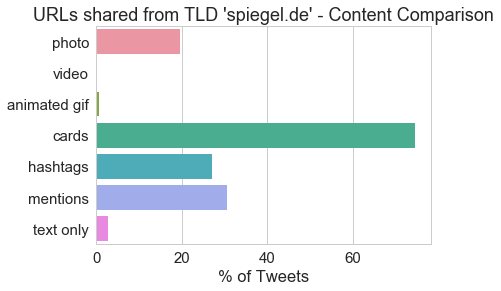

In [84]:
just_text_tweets = op_spiegel_tweets[(~op_spiegel_tweets['id'].isin(cardsS17['tweet_id'].values)) & 
                                     (~op_spiegel_tweets['id'].isin(op_images_spiegel['tweet_id'].values)) & 
                                     (~op_spiegel_tweets['id'].isin(op_hashtags_spiegel['tweet_id'].values)) &
                                     (~op_spiegel_tweets['id'].isin(op_mentions_spiegel['tweet_id'].values))]

data = {'photo': [len(set(op_images_spiegel_photo['tweet_id'].values)) / len(op_spiegel_tweets) * 100],
        'video': [len(set(op_images_spiegel_video['tweet_id'].values)) / len(op_spiegel_tweets) * 100],
        'animated gif': [len(set(op_images_spiegel_gif['tweet_id'].values)) / len(op_spiegel_tweets) * 100],
        'cards': [len(set(op_cards_spiegel['tweet_id'].values)) / len(op_spiegel_tweets) * 100],
        'hashtags': [len(set(op_hashtags_spiegel['tweet_id'].values)) / len(op_spiegel_tweets) * 100],
        'mentions': [len(set(op_mentions_spiegel['tweet_id'].values)) / len(op_spiegel_tweets) * 100],
        'text only': [len(set(just_text_tweets['id'].values)) / len(op_spiegel_tweets) * 100]}

spiegel_content_df = pd.DataFrame(data=data)

spiegel_content_df

#plt.figure(figsize=(16,12))

#print(top_urls_17[:50])
ax = sns.barplot(y=spiegel_content_df.columns, x=spiegel_content_df.values[0])
ax.set_title("URLs shared from TLD 'spiegel.de' - Content Comparison")
ax.set_xlabel("% of Tweets")

In [63]:
len(set(just_text_tweets['id'].values)) / len(op_spiegel_tweets) * 100

2.7027027027027026

In [64]:
just_text_tweets

,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
4248,988297510346207232,891960691871154176,Zur Ablenkung ein unbekanntes Bauernopfer?!\nhttps://t.co/i7yeCNx4p0,Mon Apr 23 06:04:22 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,False,False,NaN,False,...,4,False,False,None,None,1,True,None,NaN,NaN
22118,988719102515666945,5138291,"»Aus Angst, Muslime in ihrem Glauben zu beleidigen, haben britische Geschichtslehrer den Holocaust aus ihrem Unterricht verbannt.«\n\nhttps://t.co/IBmKOegTQi",Tue Apr 24 09:59:38 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,True,False,NaN,False,...,1,False,False,None,None,1,True,None,NaN,NaN
30347,988853510866382849,43935340,Unkommntierbar und unfassbar....ob er wohl Ungläubige getötet hat? https://t.co/nOYySDSqdw,Tue Apr 24 18:53:43 +0000 2018,"<a href=""http://www.facebook.com/twitter"" rel=""nofollow"">Facebook</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
37557,988890941053394945,3292982985,"Bei Kindern wird mit Zahnspangen Abzocke betrieben. Eltern werden verunsichert um Geschäft zu machen. Vor Essstörungen und ""Atmungsproblemen"" wird gewarnt. Die Kassen machen anteilig mit weil sie Eltern und Kinder, nicht alte Leute, als Mitglieder wollen https://t.co/7quWFCqyqq",Tue Apr 24 21:22:27 +0000 2018,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",de,True,False,NaN,False,...,17,False,False,None,None,1,True,None,NaN,NaN
68987,989441982195027968,1560724050,"Super, man kann jetzt auch Steuergeld-Parasit und -Schmarotzer studieren. https://t.co/vtLFi5lKKu",Thu Apr 26 09:52:06 +0000 2018,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",de,False,False,NaN,False,...,524,False,False,None,None,1,True,None,NaN,NaN
69951,989755802146684931,37021941,HIRNREIZUNG: Wut auf Kommando - DER SPIEGEL 29/1965 https://t.co/kSGNnFcJKY,Fri Apr 27 06:39:06 +0000 2018,"<a href=""http://www.apple.com/"" rel=""nofollow"">OS X</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
73838,989705555764809728,138365095,Bachelor in Flüchtlingshilfe?\nMaster of Grand Remplacement?\n\nAnti-westlichen Aktivismus kann man jetzt studieren. Im Westen. Finanziert mit westlichem Steuergeld. https://t.co/FcOp9nYelj,Fri Apr 27 03:19:26 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,True,False,NaN,False,...,64,False,False,None,None,1,True,None,NaN,NaN
85625,990122367539138560,106194249,Amazon-Experiment: Was der Konzern mit jedem Klick erfährt https://t.co/MQpRnkkC6o,Sat Apr 28 06:55:42 +0000 2018,"<a href=""http://getfalcon.pro"" rel=""nofollow"">Falcon Pro 2015 BETA</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
111265,990488528130859010,1735041,"Arm trotz Vollzeit-Arbeit: 3,7 Millionen Beschäftigte verdienen weniger als 2000 Euro brutto https://t.co/24v8wndEZA",Sun Apr 29 07:10:42 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,False,False,NaN,False,...,67,False,False,None,None,1,True,None,NaN,NaN


In [186]:
def getcompareMediaOfDataframe(tweets, images, hashtags, mentions, cards, urls):
    selected_urls = urls[urls['tweet_id'].isin(tweets['id'].values)]
    selected_images = images[images['tweet_id'].isin(tweets['id'].values)]
    selected_cards = cards[cards['tweet_id'].isin(tweets['id'].values)]
    selected_mentions = mentions[mentions['tweet_id'].isin(tweets['id'].values)]
    selected_hashtags = hashtags[hashtags['tweet_id'].isin(tweets['id'].values)]
    selected_photo = selected_images[selected_images['type'] == 'photo']
    selected_gif = selected_images[selected_images['type'] == 'animated_gif']
    selected_video = selected_images[selected_images['type'] == 'video']
    
    just_text_tweets = tweets[   (~tweets['id'].isin(cards['tweet_id'].values)) & 
                                 (~tweets['id'].isin(selected_images['tweet_id'].values)) & 
                                 (~tweets['id'].isin(selected_hashtags['tweet_id'].values)) &
                                 (~tweets['id'].isin(tweets[tweets['user_mentions'] != None]['id'].values))]

    data = {'urls': [len(set(selected_urls['tweet_id'].values)) / len(tweets) * 100],
            'photos': [len(set(selected_photo['tweet_id'].values)) / len(tweets) * 100],
            'videos': [len(set(selected_video['tweet_id'].values)) / len(tweets) * 100],
            'animated gifs': [len(set(selected_gif['tweet_id'].values)) / len(tweets) * 100],
            'cards': [len(set(selected_cards['tweet_id'].values)) / len(tweets) * 100],
            'hashtags': [len(set(selected_hashtags['tweet_id'].values)) / len(tweets) * 100],
            'user mentions': [len(set(tweets[tweets['user_mentions'] != None]['id'].values)) / len(tweets) * 100],
            'text only': [len(set(just_text_tweets['id'].values)) / len(tweets) * 100]}
    
    return pd.DataFrame(data=data)

def getTweetVariation(df, is_retweet, is_quote, is_reply):
    return df[ (df['is_retweet'] == is_retweet) & (df['is_quote'] == is_quote) & (df['is_reply'] == is_reply)]
    

Text(0.5,0,'% of Tweets')

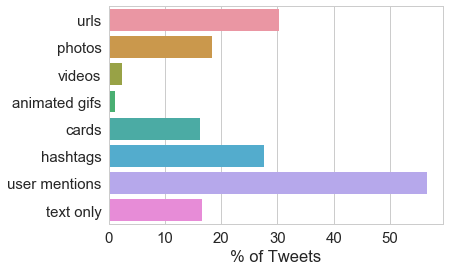

In [101]:
spiegel_content_df = getcompareMediaOfDataframe(tweetsS17, imagesS17, hashtagsS17, mentionsS17, cardsS17, urlsS17)

spiegel_content_df

#plt.figure(figsize=(16,12))

#print(top_urls_17[:50])
ax = sns.barplot(y=spiegel_content_df.columns, x=spiegel_content_df.values[0])
ax.set_xlabel("% of Tweets")

      urls    photos    videos  animated gifs   cards  hashtags  \
0  2.78072  4.229722  0.359413  1.305236       1.5171  7.067191   

   user mentions  text only  
0  100.0          0.0        


Text(0.5,0,'% of Tweets')

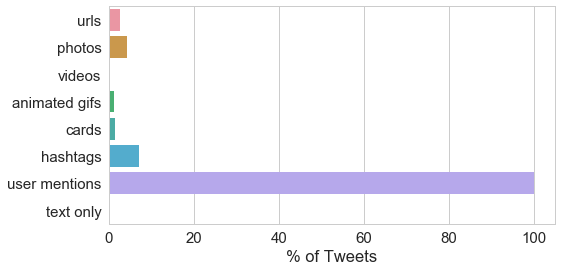

In [187]:
original_posts = getTweetVariation(tweetsS17, False, False, True)
op_contents = getcompareMediaOfDataframe(original_posts, imagesS17, hashtagsS17, mentionsS17, cardsS17, urlsS17)

print(op_contents)

plt.figure(figsize=(8,4))
ax = sns.barplot(y=op_contents.columns, x=op_contents.values[0])
ax.set_xlabel("% of Tweets")
#ax.set_title("Original Posts CW 17")

In [181]:
#original_posts = getTweetVariation(tweetsS17, False, False, True)
original_posts[original_posts['user_mentions'] != None]['id']

5         988175711348363264
14        988176042723594242
15        988176076257013765
19        988176176920367104
23        988176214677512193
27        988176311142289408
39        988024245556011011
48        988176755755282432
50        967190322282409986
54        988177003215052801
62        988001448549081088
64        988177284237615105
72        988177460368957442
73        988172151588032512
82        988177787532918784
85        988177821079097344
86        988177963693821957
88        988178169231560706
93        988100029918392320
98        988178265679392768
104       988178429282521088
107       988178500589948931
115       988178638964232192
127       988178899027849216
129       988178957756502016
132       988179058398781441
135       988179112933183489
136       988179175872884736
137       988179242981654529
138       988179242969108481
                 ...        
111885    990709708515348482
111887    990709842712125441
111888    990709842737336320
111890    9907

In [132]:
def getTweetsFromTLD(tweets, urls, top_level_domain):
    tld_urls = urls[urls['top_level_domain'] == top_level_domain ]
    return tweetsS17[tweetsS17['id'].isin(tld_urls['tweet_id'].values)]


In [150]:
top15urls = urlsS17['top_level_domain'].value_counts()[1:16]

tld = []
percentages = []
for index, value in top15urls.iteritems():
    temp_tweets = getTweetsFromTLD(tweetsS17, urlsS17, index)
    tweets_variation = getTweetVariation(temp_tweets, False, False, True)
    
    tld.append(index)
    
    percentages.append(len(tweets_variation) / len(temp_tweets) * 100)


Text(0.5,0,'% of Tweets')

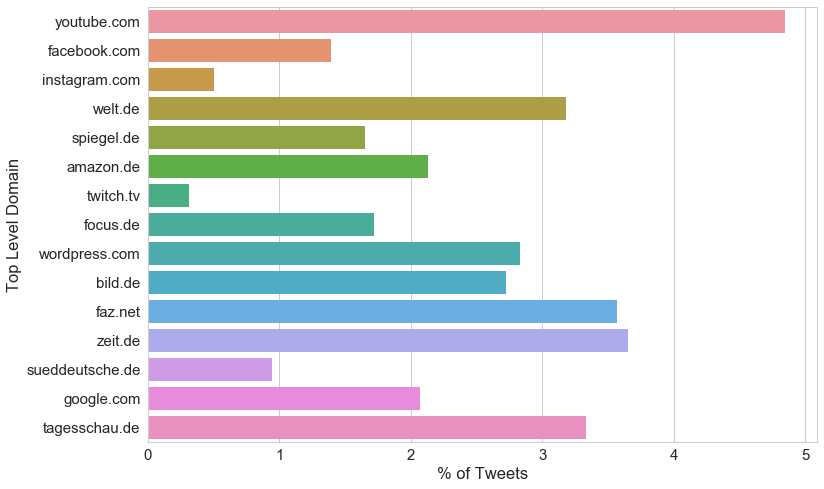

In [151]:
data = { 'percentage': percentages, 'Top Level Domain': tld}

comparison_tlds = pd.DataFrame(data=data)
plt.figure(figsize=(12,8))
ax = sns.barplot(y=comparison_tlds['Top Level Domain'], x=comparison_tlds['percentage'])
ax.set_xlabel("% of Tweets")
#ax.set_title("Original Posts CW 17")

In [136]:
comparison_tlds

,percentage,Top Level Domain
0,82.724479,youtube.com
1,91.753775,facebook.com
2,82.434128,instagram.com
3,77.340824,welt.de
4,78.537736,spiegel.de
5,84.802432,amazon.de
6,76.971609,twitch.tv
7,88.316151,focus.de
8,75.303644,wordpress.com
9,78.210117,bild.de


In [114]:
len(original_spiegel_posts) / len(about_spiegel_tweets)

0.785377358490566

In [115]:
original_spiegel_posts

,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
156,988179771426209792,950882597881737216,Wieso Waschlappigkeit trendet? Weil ein SPON-Kolumnist mal wieder die Konsequenzen der Migration relativiert und den Islam verharmlost. Dieser sei ein Ladenhüter und eine politisierte Religion.\n\nWir können mit dieser Migrationspolitik also so weitermachen.\nhttps://t.co/o1gj5KetT3,Sun Apr 22 22:16:31 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",de,True,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
951,988222649825284096,2834511,"Macron vor Besuch bei Trump: ""Wir haben keinen Plan B für Iran"" https://t.co/wCK46562Ge https://t.co/70ZHWqjjhS",Mon Apr 23 01:06:54 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
1406,988254756920377344,2834511,Frankreich: Nationalversammlung billigt schärfere Asylgesetze https://t.co/rRPWkwCIJh https://t.co/n7GoNw9S9b,Mon Apr 23 03:14:29 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,4,False,False,None,None,1,True,None,NaN,NaN
1480,549627814891094016,2887711905,Snowden-Dokumente: Was die NSA knacken kann - und was nicht http://t.co/kUVurkKbzE via @SPIEGELONLINE,Mon Dec 29 18:07:37 +0000 2014,"<a href=""https://dev.twitter.com/docs/tfw"" rel=""nofollow"">Twitter for Websites</a>",de,False,False,NaN,False,...,1,False,False,None,2834511,1,True,None,NaN,NaN
2015,987612414563643392,2834511,Schluss mit Apokalypse: Deutschland ist weltoffen und cool! https://t.co/lnJFcOgStv https://t.co/IyJs7U0Zdg,Sat Apr 21 08:42:03 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,90,False,False,None,None,1,True,None,NaN,NaN
2249,988286227068604416,273930677,Spiegel: Nach Luxleaks und Cambridge Analytica: EU will Whistleblower besser schützen https://t.co/bwK143QWW9,Mon Apr 23 05:19:32 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
2378,988289196631691265,745165314,Nach Luxleaks und Cambridge Analytica: EU will Whistleblower besser schützen https://t.co/1OqgzPyoY7 via @SPIEGELONLINE,Mon Apr 23 05:31:20 +0000 2018,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",de,False,False,NaN,False,...,0,False,False,None,2834511,1,False,None,NaN,NaN
2388,988289410566426624,17876054,"Bundesliga-Gedicht: Willst du Spannung sehen, musst du die Tabelle drehen... https://t.co/tO5oUTddhC",Mon Apr 23 05:32:11 +0000 2018,"<a href=""http://www.spiegel.de/"" rel=""nofollow"">SPIEGEL ONLINE Sport</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
2584,987742263127126016,2834511,Kriminalstatistik 2017: Zahl der Straftaten in Deutschland um fast zehn Prozent gesunken https://t.co/N6DhETfVGU https://t.co/EcZay7iq23,Sat Apr 21 17:18:01 +0000 2018,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",de,False,False,NaN,False,...,91,False,False,None,None,1,True,None,NaN,NaN
2700,988183295383998464,17876025,"Mahnwache für Hund Chico: ""Unser Held, unser Freiheitskämpfer""... https://t.co/MTtRzycE8F",Sun Apr 22 22:30:31 +0000 2018,"<a href=""http://www.spiegel.de/"" rel=""nofollow"">SPIEGEL ONLINE Panorama</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,True,None,NaN,NaN


In [184]:
def getTweetsFromTLD(tweets, urls, top_level_domain):
    tld_urls = urls[urls['top_level_domain'] == top_level_domain ]
    return tweetsS17[tweetsS17['id'].isin(tld_urls['tweet_id'].values)]

google_df = getTweetsFromTLD(tweetsS17, urlsS17, 'google.com')

In [185]:
google_df

,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
308,988185261782851584,3688757961,WM-Qualifikation am 1. Juli https://t.co/80egeTYrZz,Sun Apr 22 22:38:20 +0000 2018,"<a href=""https://ifttt.com"" rel=""nofollow"">IFTTT</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
383,988187937740328965,878355890688143361,Digest :\nhttps://t.co/mgIbUpRP2j,Sun Apr 22 22:48:58 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
2710,988298046613139456,806956109911195648,So will Hamburgs CDU zurück an die Macht\n\nhttps://t.co/1AIM4fqXIK\n\n--\nEmpfohlen von WELT News für Android\nhttps://t.co/K1npseHdZu,Mon Apr 23 06:06:30 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,False,False,NaN,False,...,0,False,False,None,None,2,False,None,NaN,NaN
3570,988316824503635968,1731697458,Ein Toter und viele Verletzte bei Unfällen am Wochenende - DIE WELT https://t.co/zdZp9vdSVc,Mon Apr 23 07:21:07 +0000 2018,"<a href=""http://twittbot.net/"" rel=""nofollow"">twittbot.net</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
3703,988319236228632577,203168049,"#literatuur 51,95. Bladmuziek. Die Kunst des Flotenspiels. Der Naturliche Weg. Die Kunst des Flotenspiels. Der… https://t.co/G2HiM82ujZ",Mon Apr 23 07:30:42 +0000 2018,"<a href=""http://www.google.com/"" rel=""nofollow"">Google</a>",de,False,False,NaN,False,...,0,False,False,literatuur,None,1,False,None,NaN,NaN
3726,988319651494027264,282015548,Spiritualität und theologische Ausbildung https://t.co/g6yM6Tu1LI,Mon Apr 23 07:32:21 +0000 2018,"<a href=""https://ifttt.com"" rel=""nofollow"">IFTTT</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
4015,988325091481137158,928725624067420161,"Veschloss'ne Glut ist's, die am tiefsten wühlt.\nKreuzworträtsel Deutsch kostenlos,Google Play App\nhttps://t.co/pSM5NAcY0r",Mon Apr 23 07:53:58 +0000 2018,"<a href=""http://fgcos.com"" rel=""nofollow"">RandomCrosswordQuestions</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
4770,987654688282685440,939209283551612928,FENIX COIN FIRST AIRDROP ROUND IS LIVE NOW\n#FNXC #BLOCKCHAIN #FENIXCOIN #FENIX\nhttps://t.co/gmXRYsn8aL,Sat Apr 21 11:30:02 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",en,False,False,NaN,False,...,916,False,False,FNXC BLOCKCHAIN FENIXCOIN FENIX,None,1,True,None,NaN,NaN
4839,988342548195397632,195684686,#WelttagdesBuches #Motivation #Montag #burnout #Buch \n\nDie Bibliotherapie wird schon seit dem 18. Jh. eingesetzt. Sie gehört zu den preiswerten Trainings der Persönlichkeit und zur Behandlung von leichten psychologisch-psychiatrischem Unwohlsein\n\nhttps://t.co/jprEfkMC2p,Mon Apr 23 09:03:20 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,True,False,NaN,False,...,0,False,False,WelttagdesBuches Motivation Montag burnout Buch,None,1,False,None,NaN,NaN
4973,988345551296049152,279500776,Tesla erhält schlechte Note von Verbraucherschützern https://t.co/pooNrYmjik,Mon Apr 23 09:15:16 +0000 2018,"<a href=""https://ifttt.com"" rel=""nofollow"">IFTTT</a>",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
